In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("/content/drive/MyDrive/data_multi.csv")

In [ ]:
data

In [5]:
# Select columns to rename
dem_columns = [f'DEM {i}' for i in range(1, 101)]

# Rename columns
new_dem_columns = [f'DEM_{i}' for i in range(1, 101)]
data = data.rename(columns=dict(zip(dem_columns, new_dem_columns)))


In [ ]:

# Repeat 'Rainfall' and 'Temperature' across 100 new columns
for i in range(1, 101):
    data[f'Rainfall_{i}'] = data['Rainfall']

for i in range(1, 101):
    data[f'Temperature_{i}'] = data['Temperature']

# Delete the original 'Rainfall' and 'Temperature' columns
data = data.drop(columns=['Rainfall', 'Temperature'])


In [ ]:
data

In [ ]:

from sklearn.preprocessing import RobustScaler

# Scale temperature, rainfall, NDVI, and DEM variables
temp_scalers = [RobustScaler() for _ in range(100)]
rain_scalers = [RobustScaler() for _ in range(100)]
ndvi_scalers = [RobustScaler() for _ in range(100)]
dem_scalers = [RobustScaler() for _ in range(100)]  # Assuming there are 100 DEM features

for i in range(1, 101):
    data[f'Temperature_{i}_scaled'] = temp_scalers[i - 1].fit_transform(data[f'Temperature_{i}'].values.reshape(-1, 1))
    data[f'Rainfall_{i}_scaled'] = rain_scalers[i - 1].fit_transform(data[f'Rainfall_{i}'].values.reshape(-1, 1))
    data[f'NDVI_{i}_scaled'] = ndvi_scalers[i - 1].fit_transform(data[f'NDVI_{i}'].values.reshape(-1, 1))
    data[f'DEM_{i}_scaled'] = dem_scalers[i - 1].fit_transform(data[f'DEM_{i}'].values.reshape(-1, 1))




In [8]:
import re

# Define the regular expression pattern
pattern = re.compile(r'^(Rainfall|Temperature|NDVI|DEM)_[0-9]+(?<!_scaled)$')

# Get the columns to drop
cols_to_drop = [col for col in data.columns if pattern.search(col)]

# Drop the columns from the dataframe
data_scaled = data.drop(cols_to_drop, axis=1)



In [ ]:
data_scaled

,Pixel_ID,Timestep,Date,Temperature_1_scaled,Rainfall_1_scaled,NDVI_1_scaled,DEM_1_scaled,Temperature_2_scaled,Rainfall_2_scaled,NDVI_2_scaled,...,NDVI_98_scaled,DEM_98_scaled,Temperature_99_scaled,Rainfall_99_scaled,NDVI_99_scaled,DEM_99_scaled,Temperature_100_scaled,Rainfall_100_scaled,NDVI_100_scaled,DEM_100_scaled
0,0,1,2018-10-17,0.081633,3.444444,-0.731901,-0.072791,0.081633,3.444444,-0.732148,...,-0.849357,-0.066084,0.081633,3.444444,-1.119594,-0.063375,0.081633,3.444444,-1.032068,-0.065271
1,0,2,2018-10-22,0.142857,1.777778,-0.731901,-0.072791,0.142857,1.777778,-0.732148,...,-0.849357,-0.066084,0.142857,1.777778,-1.119594,-0.063375,0.142857,1.777778,-1.032068,-0.065271
2,0,3,2018-10-27,0.061224,0.222222,-0.633874,-0.072791,0.061224,0.222222,-0.705383,...,-0.680146,-0.066084,0.061224,0.222222,-1.063278,-0.063375,0.061224,0.222222,-1.054793,-0.065271
3,0,4,2018-11-01,-0.571429,2.888889,-0.507797,-0.072791,-0.571429,2.888889,-0.551353,...,-0.586261,-0.066084,-0.571429,2.888889,-0.927860,-0.063375,-0.571429,2.888889,-0.807406,-0.065271
4,0,5,2018-11-06,-0.265306,2.222222,-0.448338,-0.072791,-0.265306,2.222222,-0.545247,...,-0.508481,-0.066084,-0.265306,2.222222,-0.858075,-0.063375,-0.265306,2.222222,-0.772909,-0.065271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615385,23697,26,2019-10-26,-0.693878,1.333333,-0.710745,-0.747847,-0.693878,1.333333,0.749199,...,3.693351,-0.751021,-0.693878,1.333333,0.054765,-0.742512,-0.693878,1.333333,1.079038,-0.737156
615386,23697,27,2019-10-31,-1.346939,0.333333,-0.963368,-0.747847,-1.346939,0.333333,0.821347,...,6.650743,-0.751021,-1.346939,0.333333,-0.023194,-0.742512,-1.346939,0.333333,1.439357,-0.737156
615387,23697,28,2019-11-05,-1.367347,0.000000,-1.261805,-0.747847,-1.367347,0.000000,0.903549,...,10.840347,-0.751021,-1.367347,0.000000,-0.102700,-0.742512,-1.367347,0.000000,1.913926,-0.737156
615388,23697,29,2019-11-10,-1.428571,1.222222,-1.609876,-0.747847,-1.428571,1.222222,0.996413,...,16.469778,-0.751021,-1.428571,1.222222,-0.183623,-0.742512,-1.428571,1.222222,2.517775,-0.737156


In [9]:
# Split the data in 70% training, 20% validation and 10% testing
pixel_ids = data_scaled['Pixel_ID'].unique()
split_idx_1 = int(0.7 * len(pixel_ids))
split_idx_2 = int(0.9 * len(pixel_ids))
train_pixel_ids = pixel_ids[:split_idx_1]
val_pixel_ids = pixel_ids[split_idx_1:split_idx_2]
test_pixel_ids = pixel_ids[split_idx_2:]

train_scaled = data_scaled.loc[data['Pixel_ID'].isin(train_pixel_ids)]
val_scaled = data.loc[data_scaled['Pixel_ID'].isin(val_pixel_ids)]
test_scaled = data.loc[data_scaled['Pixel_ID'].isin(test_pixel_ids)]

In [ ]:
train_scaled

In [10]:
# Select input and output variables
input_vars = [f'NDVI_{i}_scaled' for i in range(1, 101)] + [f'Rainfall_{i}_scaled' for i in range(1, 101)] + [f'Temperature_{i}_scaled' for i in range(1, 101)] + [f'DEM_{i}_scaled' for i in range(1, 101)]
output_vars = [f'NDVI_{i}_scaled' for i in range(1, 101)]

# Define window size for input sequences
window_size = 20

# Create sequences of input and output for training data
X_train = []
y_train = []
for pixel_id in train_scaled['Pixel_ID'].unique():
    pixel_data = train_scaled[train_scaled['Pixel_ID'] == pixel_id].reset_index(drop=True)
    for i in range(window_size, pixel_data.shape[0]):
        X_train.append(pixel_data.loc[i-window_size:i-1, input_vars].values)
        y_train.append(pixel_data.loc[i, output_vars].values)

# Create sequences of input and output for validation data
X_val = []
y_val = []
for pixel_id in val_scaled['Pixel_ID'].unique():
    pixel_data = val_scaled[val_scaled['Pixel_ID'] == pixel_id].reset_index(drop=True)
    for i in range(window_size, pixel_data.shape[0]):
        X_val.append(pixel_data.loc[i-window_size:i-1, input_vars].values)
        y_val.append(pixel_data.loc[i, output_vars].values)

# Create sequences of input and output for testing data
X_test = []
y_test = []
for pixel_id in test_scaled['Pixel_ID'].unique():
    pixel_data = test_scaled[test_scaled['Pixel_ID'] == pixel_id].reset_index(drop=True)
    for i in range(window_size, pixel_data.shape[0]):
        X_test.append(pixel_data.loc[i-window_size:i-1, input_vars].values)
        y_test.append(pixel_data.loc[i, output_vars].values)


In [11]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [12]:
print("X_train shape:", np.shape(X_train))
print("X_val shape:", np.shape(X_val))
print("X_test shape:", np.shape(X_test))
print("y_train shape:", np.shape(y_train))
print("y_val shape:", np.shape(y_val))
print("y_test shape:", np.shape(y_test))

X_train shape: (143590, 20, 400)
X_val shape: (41020, 20, 400)
X_test shape: (20520, 20, 400)
y_train shape: (143590, 100)
y_val shape: (41020, 100)
y_test shape: (20520, 100)


# 1. Split and normalize the data

# 2. Build data structure for train the model

In [13]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l1,l2
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import backend as K
import joblib
from keras.models import load_model


## 2.1 Random forest model

In [ ]:
# Train the Random Forest model with increased n_estimators and max_depth
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)

In [ ]:
rf_model.fit(X_train.reshape((X_train.shape[0], -1)), y_train)

RandomForestRegressor(max_depth=15, n_estimators=200, random_state=42)

In [ ]:
# Evaluate the model on the test set
rf_test_flat = X_test.reshape(X_test.shape[0], -1)

rf_mse = mean_squared_error(y_test, rf_model.predict(rf_test_flat))
print("Random forest MSE:", rf_mse)

Random forest MSE: 0.03932417345901671


In [ ]:
# Save the model
joblib.dump(rf_model, "/content/drive/MyDrive/Saved_models/rf_model_avg.pkl")

['/content/drive/MyDrive/Saved_models/rf_model_multi.pkl']

In [ ]:
# Load rf model
rf_model = joblib.load("/content/drive/MyDrive/Saved_models/rf_model_avg.pkl")

In [ ]:
# Predict the NDVI values using the Random Forest model
rf_pred_test = rf_model.predict(X_test.reshape((X_test.shape[0], -1)))

# Inverse transform the predicted NDVI values
rf_inverse_y_pred_test = scaler.inverse_transform(np.hstack([rf_pred_test.reshape(-1, 1), np.zeros((rf_pred_test.shape[0], 2))]))[:, 0]

# Check the inverse transformed values
print(rf_inverse_y_pred_test)
rf_inverse_y_pred_test_df = pd.DataFrame(rf_inverse_y_pred_test)
rf_inverse_y_pred_test_df.describe().transpose()

[0.75378738 0.74642369 0.73363027 ... 0.32096486 0.31442708 0.32181357]


,count,mean,std,min,25%,50%,75%,max
0,20520.0,0.560223,0.175878,-0.752662,0.440023,0.571023,0.700453,0.886475


## 2.2 LSTM model

In [ ]:
from keras.callbacks import EarlyStopping
from keras.regularizers import L1L2

# Define the LSTM model architecture
lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape=(window_size, len(input_vars)), activation='tanh', kernel_regularizer=L1L2(l1=0.01, l2=0.01)))
lstm_model.add(Dense(1))
lstm_model.compile(loss="MSE", optimizer='adam')

# Set up early stopping callback with increased patience
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


In [ ]:
# Train the model
lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=50,  
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)

In [ ]:
# Evaluate the model on the test set
lstm_mse = mean_squared_error(y_test, lstm_model.predict(X_test))
print("LSTM MSE:", lstm_mse)

In [ ]:
lstm_model.save("/content/drive/MyDrive/Saved_models/lstm_model_avg")

In [ ]:
# Load lstm model
lstm_model = load_model("/content/drive/MyDrive/Saved_models/lstm_model_avg")

In [ ]:
# Predict the NDVI values 
lstm_pred_test = lstm_model.predict(X_test)

# Inverse transform the predicted NDVI values
lstm_inverse_y_pred_test = scaler.inverse_transform(np.hstack([lstm_pred_test.reshape(-1, 1), np.zeros((lstm_pred_test.shape[0], 2))]))[:, 0]

# Check the inverse transformed values
print(lstm_inverse_y_pred_test)
lstm_inverse_y_pred_test_df = pd.DataFrame(lstm_inverse_y_pred_test)
lstm_inverse_y_pred_test_df.describe().transpose()

In [ ]:
# Plot training and validation loss for LSTM
plt.figure(figsize=(6, 3))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## 2.3 convLSTM

In [14]:
# Convert lists to numpy arrays
X_train = np.array(X_train).astype('float32')
y_train = np.array(y_train).astype('float32')
X_val = np.array(X_val).astype('float32')
y_val = np.array(y_val).astype('float32')
X_test = np.array(X_test).astype('float32')
y_test = np.array(y_test).astype('float32')


In [15]:
# Determine the dimensions of the input data
samples_train = X_train.shape[0]
samples_val = X_val.shape[0]
samples_test = X_test.shape[0]
time = X_train.shape[1]
channels = X_train.shape[2]

# Reshape the input data to be suitable for ConvLSTM
X_train = X_train.reshape((samples_train, time, 10, 10, 4))  # 4 for NDVI, DEM, Rainfall, and Temperature
X_val = X_val.reshape((samples_val, time, 10, 10, 4))
X_test = X_test.reshape((samples_test, time, 10, 10, 4))

In [16]:
# # Reshape y_train, y_val, and y_test

y_train = tf.reshape(y_train, (-1, 10, 10, 1))
y_val = tf.reshape(y_val, (-1, 10, 10, 1))
y_test = tf.reshape(y_test, (-1, 10, 10, 1)) 



In [ ]:
print("X_train shape:", np.shape(X_train))
print("X_val shape:", np.shape(X_val))
print("X_test shape:", np.shape(X_test))
print("y_train shape:", np.shape(y_train))
print("y_val shape:", np.shape(y_val))
print("y_test shape:", np.shape(y_test))

X_train shape: (143590, 20, 10, 10, 4)
X_val shape: (41020, 20, 10, 10, 4)
X_test shape: (20520, 20, 10, 10, 4)
y_train shape: (143590, 10, 10, 1)
y_val shape: (41020, 10, 10, 1)
y_test shape: (20520, 10, 10, 1)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Dense

# Define height, width, and number of channels
height = 10
width = 10
num_channels = 4

num_outputs = 1

# Define the model architecture
convlstm_model = Sequential()
convlstm_model.add(ConvLSTM2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(window_size, height, width, num_channels), padding='same', return_sequences=True))
convlstm_model.add(BatchNormalization())
convlstm_model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', return_sequences=False))
convlstm_model.add(BatchNormalization())
# convlstm_model.add(Flatten())
convlstm_model.add(Dense(num_outputs, activation='linear'))


# Define loss function and optimizer
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

# Compile the model
convlstm_model.compile(loss=loss_fn, optimizer=optimizer)

# Set up early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Print the model summary
convlstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 20, 10, 10, 32)    41600     
                                                                 
 batch_normalization (BatchN  (None, 20, 10, 10, 32)   128       
 ormalization)                                                   
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 10, 10, 16)        27712     
                                                                 
 batch_normalization_1 (Batc  (None, 10, 10, 16)       64        
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 10, 10, 1)         17        
                                                                 
Total params: 69,521
Trainable params: 69,425
Non-traina

In [18]:
convlstm_pred_train = convlstm_model.predict(X_train)
convlstm_pred_val = convlstm_model.predict(X_val)
convlstm_pred_test = convlstm_model.predict(X_test)

642/642 [==============================] - 15s 24ms/step


In [ ]:
# convlstm_pred_train = convlstm_pred_train.reshape((143590, -1))
# convlstm_pred_val = convlstm_pred_val.reshape((41020, -1))
# convlstm_pred_test = convlstm_pred_test.reshape((20520, -1))

In [37]:
# Check the shapes of y_true and y_pred
print(np.array(y_train).shape)
print(np.array(y_val).shape)
print(np.array(y_test).shape)
print(np.array(convlstm_pred_train).shape)
print(np.array(convlstm_pred_val).shape)
print(np.array(convlstm_pred_test).shape)
print(X_train.shape)

(143590, 10, 10, 1)
(41020, 10, 10, 1)
(20520, 100)
(143590, 10, 10, 1)
(41020, 10, 10, 1)
(20520, 100)
(143590, 20, 10, 10, 4)


In [19]:
# Train the model
convlstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32,callbacks=[early_stop])

Epoch 1/50
4488/4488 [==============================] - 799s 176ms/step - loss: 0.3353 - val_loss: 0.3396
Epoch 2/50
4488/4488 [==============================] - 787s 175ms/step - loss: 0.2159 - val_loss: 0.3897
Epoch 3/50
4488/4488 [==============================] - 781s 174ms/step - loss: 0.3226 - val_loss: 0.4476
Epoch 4/50
4488/4488 [==============================] - 780s 174ms/step - loss: 0.3109 - val_loss: 0.3770
Epoch 5/50
4488/4488 [==============================] - 779s 174ms/step - loss: 0.3145 - val_loss: 0.5051
Epoch 6/50
4488/4488 [==============================] - 779s 174ms/step - loss: 0.3323 - val_loss: 0.4430
Epoch 7/50
4488/4488 [==============================] - 781s 174ms/step - loss: 0.2994 - val_loss: 0.3748
Epoch 8/50
4488/4488 [==============================] - 780s 174ms/step - loss: 0.2912 - val_loss: 0.4223
Epoch 9/50
4488/4488 [==============================] - 780s 174ms/step - loss: 0.2932 - val_loss: 0.3886
Epoch 10/50
4488/4488 [=======================

In [53]:
# Flatten the predictions
convlstm_pred_test = convlstm_pred_test.reshape(convlstm_pred_test.shape[0], -1)
convlstm_pred_val = convlstm_pred_val.reshape(convlstm_pred_val.shape[0], -1)
y_test = np.array(y_test).reshape(y_test.shape[0], -1)

print(np.array(convlstm_pred_test).shape)
print(np.array(y_test).shape)

(20520, 100)
(20520, 100)


In [29]:
# Now compute MSE
convlstm_mse = mean_squared_error(y_test, convlstm_pred_test)
print("convLSTM Mean Squared Error:", convlstm_mse)

convLSTM Mean Squared Error: 0.32569793


In [31]:
# save model
convlstm_model.save("/content/drive/MyDrive/Saved_models/convlstm_model_multi")

In [32]:
# Load convlstm model
convlstm_model = load_model("/content/drive/MyDrive/Saved_models/convlstm_model_multi")

## 2.4 Transformer

In [ ]:
pip install tensorflow

In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention, TimeDistributed
from tensorflow.keras.layers import Conv1D, Conv2D, GlobalMaxPooling1D, Concatenate
from tensorflow.keras.layers import GlobalAveragePooling1D, AveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import layers, Model


In [40]:
# Positional encoding for the transformer model

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(d_model)[np.newaxis, :],
                            d_model)
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)

def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    return pos * angle_rates

# Scaled dot product attention
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    output = tf.matmul(attention_weights, v)
    return output, attention_weights

# Multi-head attention
class MultiHeadAttention(layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        assert d_model % self.num_heads == 0
        self.depth = d_model // self.num_heads
        self.wq = layers.Dense(d_model)
        self.wk = layers.Dense(d_model)
        self.wv = layers.Dense(d_model)
        self.dense = layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]
        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)
        scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
        output = self.dense(concat_attention)
        return output, attention_weights

# Transformer Encoder Layer
class TransformerEncoderLayer(layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(TransformerEncoderLayer, self).__init__()
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = tf.keras.Sequential([
            layers.Dense(dff, activation='relu'),
            
            layers.Dense(d_model)
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)
        return out2

# Transformer Encoder
class TransformerEncoder(layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_shape, rate=0.1):
        super(TransformerEncoder, self).__init__()
        self.d_model = d_model
        self.num_layers = num_layers
        self.embedding = layers.Dense(self.d_model, activation='linear')
        self.pos_encoding = positional_encoding(input_shape[0], self.d_model)
        self.enc_layers = [TransformerEncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = layers.Dropout(rate)

    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]
        x = self.dropout(x, training=training)
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)
        return x

def create_simplified_transformer_model(input_shape, num_layers, d_model, num_heads, dff, rate=0.1):
    inputs = layers.Input(shape=input_shape)
    conv2d = layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu'))(inputs)
    reshaped = layers.Reshape((input_shape[0], -1))(conv2d)
    mask = None
    x = TransformerEncoder(num_layers, d_model, num_heads, dff, (input_shape[0], reshaped.shape[-1]), rate)(reshaped, training=None, mask=mask)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(10*10, activation='linear')(x) # Output layer now has size 10*10
    x = layers.Reshape((10, 10, 1))(x) # Reshape to match your y_true shape
    x = layers.Dense(1)(x) # Add another dense layer
    outputs = layers.Reshape((10, 10, 1))(x) # Reshape to match your y_true shape
    model = Model(inputs=inputs, outputs=outputs)
    return model


input_shape = (20, 10, 10, 4)
num_layers = 1
d_model = 32
num_heads = 2
dff = 64
dropout_rate = 0.1

transformer_model = create_simplified_transformer_model(input_shape, num_layers, d_model, num_heads, dff, dropout_rate)
transformer_model.summary()

transformer_model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mae'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)




Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20, 10, 10, 4)]   0         
                                                                 
 time_distributed_1 (TimeDis  (None, 20, 8, 8, 32)     1184      
 tributed)                                                       
                                                                 
 reshape_2 (Reshape)         (None, 20, 2048)          0         
                                                                 
 transformer_encoder_2 (Tran  (None, 20, 32)           74112     
 sformerEncoder)                                                 
                                                                 
 global_average_pooling1d_2   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                           

In [41]:
history = transformer_model.fit(X_train, y_train, epochs=100, batch_size=64,validation_data=(X_val, y_val),callbacks=[early_stop])


Epoch 1/100
2244/2244 [==============================] - 31s 12ms/step - loss: 0.1801 - mae: 0.3269 - val_loss: 0.2304 - val_mae: 0.3596
Epoch 2/100
2244/2244 [==============================] - 24s 11ms/step - loss: 0.1587 - mae: 0.3048 - val_loss: 0.2215 - val_mae: 0.3478
Epoch 3/100
2244/2244 [==============================] - 24s 11ms/step - loss: 0.1525 - mae: 0.2967 - val_loss: 0.2140 - val_mae: 0.3444
Epoch 4/100
2244/2244 [==============================] - 25s 11ms/step - loss: 0.1450 - mae: 0.2874 - val_loss: 0.2226 - val_mae: 0.3514
Epoch 5/100
2244/2244 [==============================] - 24s 11ms/step - loss: 0.1454 - mae: 0.2884 - val_loss: 0.2156 - val_mae: 0.3389
Epoch 6/100
2244/2244 [==============================] - 25s 11ms/step - loss: 0.1409 - mae: 0.2827 - val_loss: 0.2102 - val_mae: 0.3365
Epoch 7/100
2244/2244 [==============================] - 25s 11ms/step - loss: 0.1367 - mae: 0.2775 - val_loss: 0.2094 - val_mae: 0.3363
Epoch 8/100
2244/2244 [==================

In [55]:
transformer_pred_train = transformer_model.predict(X_train)
transformer_pred_val = transformer_model.predict(X_val)
transformer_pred_test = transformer_model.predict(X_test)

642/642 [==============================] - 3s 4ms/step


In [58]:
# Flatten the predictions
transformer_pred_test = transformer_pred_test.reshape(transformer_pred_test.shape[0], -1)
transformer_pred_val = transformer_pred_val.reshape(transformer_pred_val.shape[0], -1)

print(np.array(transformer_pred_test).shape)
print(np.array(y_test).shape)

(20520, 100)
(20520, 100)


In [48]:
# Evaluate the model on the test set
transformer_mse = mean_squared_error(y_test, transformer_pred_test)
print("Transformer Mean Squared Error:", transformer_mse)

Transformer Mean Squared Error: 0.14750499


In [49]:
# save model
transformer_model.save("/content/drive/MyDrive/Saved_models/transformer_model_multi")

In [50]:
# Load transformer model
transformer_model = load_model("/content/drive/MyDrive/Saved_models/transformer_model_multi")

# 3. Compare the model performance

In [52]:
# Load models
rf_model = joblib.load("/content/drive/MyDrive/Saved_models/rf_model_avg.pkl")
lstm_model = load_model("/content/drive/MyDrive/Saved_models/lstm_model_avg")
convlstm_model = load_model("/content/drive/MyDrive/Saved_models/convlstm_model_multi")
transformer_model = load_model("/content/drive/MyDrive/Saved_models/transformer_model_multi")

In [ ]:
# predicted NDVI values for rf, LSTM,convLSTM,transformer model
#test
rf_pred_test = rf_model.predict(X_test.reshape((X_test.shape[0], -1)))
lstm_pred_test = lstm_model.predict(X_test)

#val
rf_pred_val = rf_model.predict(X_val.reshape((X_val.shape[0], -1)))
lstm_pred_val = lstm_model.predict(X_val)

In [ ]:
# Compare the model performance by scatter plot of predicted and expected NDVI

# Inverse transform the true NDVI values for the test set
inverse_y_test = scaler.inverse_transform(np.hstack([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 2))]))[:, 0]
# Inverse transform the true NDVI values for the validation set
inverse_y_val = scaler.inverse_transform(np.hstack([y_val.reshape(-1, 1), np.zeros((y_val.shape[0], 2))]))[:, 0]

# Inverse transform the predicted NDVI values for 4 models
rf_inverse_y_pred_test = scaler.inverse_transform(np.hstack([rf_pred_test.reshape(-1, 1), np.zeros((rf_pred_test.shape[0], 2))]))[:, 0]
lstm_inverse_y_pred_test = scaler.inverse_transform(np.hstack([lstm_pred_test, np.zeros((lstm_pred_test.shape[0], 2))]))[:, 0]
convlstm_inverse_y_pred_test = scaler.inverse_transform(np.hstack([convlstm_pred_test, np.zeros((convlstm_pred_test.shape[0], 2))]))[:, 0]
transformer_inverse_y_pred_test = scaler.inverse_transform(np.hstack([transformer_pred_test, np.zeros((transformer_pred_test.shape[0], 2))]))[:, 0]

# Inverse transform the predicted NDVI validation values for 4 models
rf_inverse_y_pred_val = scaler.inverse_transform(np.hstack([rf_pred_val.reshape(-1, 1), np.zeros((rf_pred_val.shape[0], 2))]))[:, 0]
lstm_inverse_y_pred_val = scaler.inverse_transform(np.hstack([lstm_pred_val, np.zeros((lstm_pred_val.shape[0], 2))]))[:, 0]
convlstm_inverse_y_pred_val = scaler.inverse_transform(np.hstack([convlstm_pred_val, np.zeros((convlstm_pred_val.shape[0], 2))]))[:, 0]
transformer_inverse_y_pred_val = scaler.inverse_transform(np.hstack([transformer_pred_val, np.zeros((transformer_pred_val.shape[0], 2))]))[:, 0]

# Calculate MSE for each model on testing set
mse_rf_val = mean_squared_error(inverse_y_val, rf_inverse_y_pred_val)
mse_lstm_val = mean_squared_error(inverse_y_val, lstm_inverse_y_pred_val)
mse_convlstm_val = mean_squared_error(inverse_y_val, convlstm_inverse_y_pred_val)
mse_transformer_val = mean_squared_error(inverse_y_val, transformer_inverse_y_pred_val)

# Calculate MSE for each model on testing set
mse_rf_test = mean_squared_error(inverse_y_test, rf_inverse_y_pred_test)
mse_lstm_test = mean_squared_error(inverse_y_test, lstm_inverse_y_pred_test)
mse_convlstm_test = mean_squared_error(inverse_y_test, convlstm_inverse_y_pred_test)
mse_transformer_test = mean_squared_error(inverse_y_test, transformer_inverse_y_pred_test)

# Calculate R2 scores for the test set
r2_rf_test = r2_score(inverse_y_test, rf_inverse_y_pred_test)
r2_lstm_test = r2_score(inverse_y_test, lstm_inverse_y_pred_test)
r2_convlstm_test = r2_score(inverse_y_test, convlstm_inverse_y_pred_test)
r2_transformer_test = r2_score(inverse_y_test, transformer_inverse_y_pred_test)

# Calculate RMSE scores for the test set
rmse_rf_test = np.sqrt(mean_squared_error(inverse_y_test, rf_inverse_y_pred_test))
rmse_lstm_test = np.sqrt(mean_squared_error(inverse_y_test, lstm_inverse_y_pred_test))
rmse_convlstm_test = np.sqrt(mean_squared_error(inverse_y_test, convlstm_inverse_y_pred_test))
rmse_transformer_test = np.sqrt(mean_squared_error(inverse_y_test, transformer_inverse_y_pred_test))



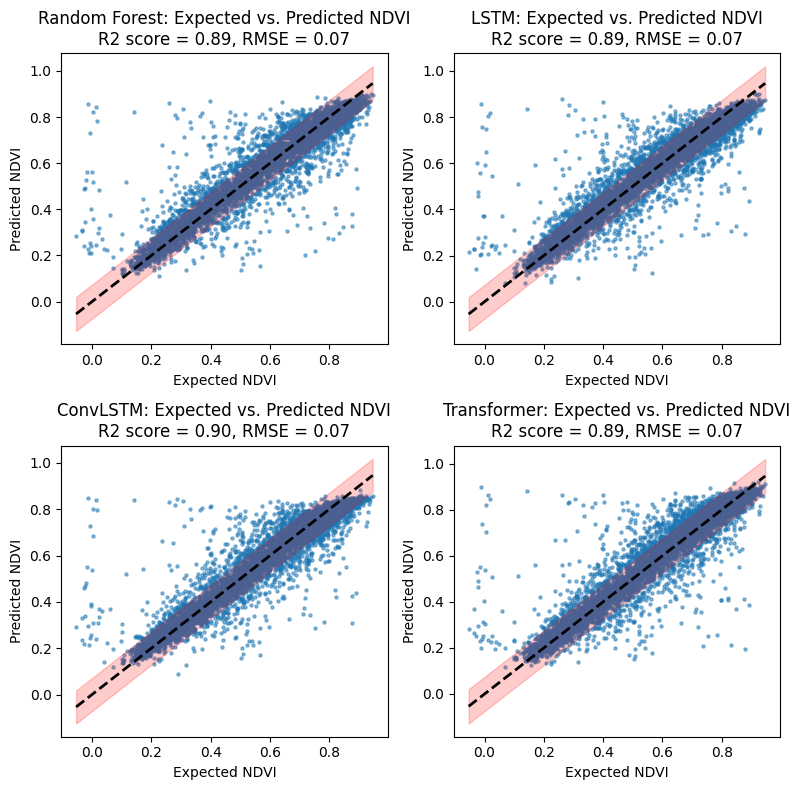

In [ ]:

# Create a 2x2 grid of subplots for the 4 different models
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Set titles and labels
titles = ['Random Forest', 'LSTM', 'ConvLSTM', 'Transformer']
predictions = [rf_inverse_y_pred_test, lstm_inverse_y_pred_test, convlstm_inverse_y_pred_test, transformer_inverse_y_pred_test]
r2_scores = [r2_rf_test, r2_lstm_test, r2_convlstm_test, r2_transformer_test]
rmse_scores = [rmse_rf_test, rmse_lstm_test, rmse_convlstm_test, rmse_transformer_test]

for idx, ax in enumerate(axes.flatten()):
    ax.scatter(inverse_y_test, predictions[idx], s=5, alpha=0.5)
    
    # One-to-one line
    ax.plot([min(inverse_y_test), max(inverse_y_test)], [min(inverse_y_test), max(inverse_y_test)], 'k--', lw=2)
    
    # Deviation line
    deviation = np.std(inverse_y_test - predictions[idx])
    ax.fill_between(np.sort(inverse_y_test), np.sort(inverse_y_test) - deviation, np.sort(inverse_y_test) + deviation, alpha=0.2, color='r')
    
    ax.set_xlabel('Expected NDVI')
    ax.set_ylabel('Predicted NDVI')
    ax.set_title(f'{titles[idx]}: Expected vs. Predicted NDVI\nR2 score = {r2_scores[idx]:.2f}, RMSE = {rmse_scores[idx]:.2f}')

plt.tight_layout()
plt.show()

<Figure size 600x300 with 0 Axes>

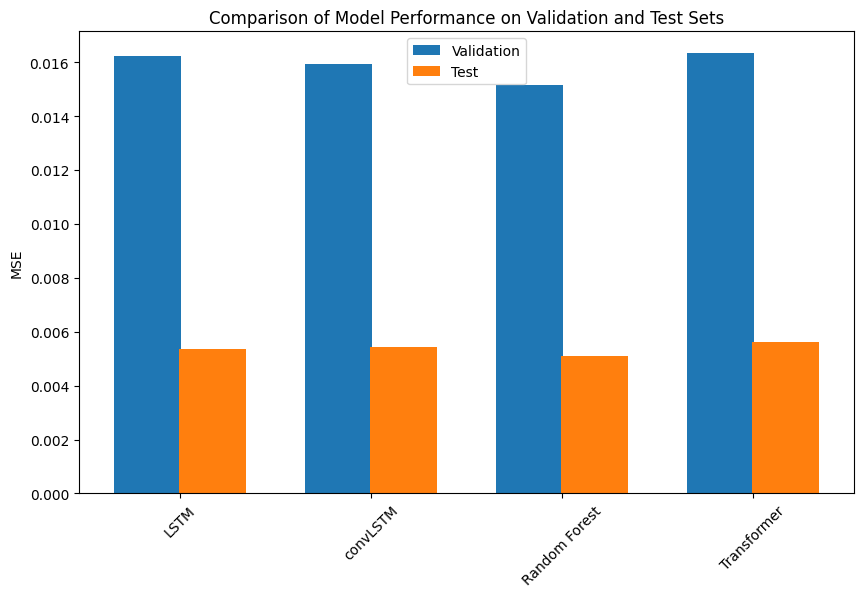

In [ ]:
# Compare the Mean Squared Error (MSE) for models

# Plot bar chart
plt.figure(figsize=(6, 3))
x = np.arange(2)
width = 0.3

# Plot bar chart
plt.figure(figsize=(10, 6))
x = np.arange(4)
width = 0.35

plt.bar(x - 0.17, [mse_rf_val, mse_lstm_val, mse_convlstm_val, mse_transformer_val], width, label='Validation')
plt.bar(x + 0.17, [mse_lstm_test, mse_rf_test, mse_convlstm_test, mse_transformer_test], width, label='Test')
plt.xticks(ticks=x, labels=['LSTM' ,'convLSTM','Random Forest', 'Transformer'],
           rotation=45)
plt.ylabel('MSE')
plt.title('Comparison of Model Performance on Validation and Test Sets')
_ = plt.legend()
plt.show()



# 4. View the single and multiple steps prediction performance

## 4.1 Single prediction step

In [ ]:
# single step visualization 5 samples - LSTM/RF/convLSTM/randofrmer

# single step prediction 
def show_plot(plot_data, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    future = 1

    fig, ax = plt.subplots(figsize=(6, 3))
    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=5, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 2) * 2])
    plt.xlabel("Time-Step")
    plt.show()

# Prepare data for the plot
n = 5  # number of samples to visualize
random_indices = np.random.choice(len(X_test), n, replace=False)

for i, idx in enumerate(random_indices):
    x_sample = X_test[idx]
    y_sample = y_test[idx]
    y_pred_lstm = lstm_model.predict(x_sample[np.newaxis, :, :])[0]

    history_ndvi = x_sample[:, 0]  # Select only NDVI_scaled from input_vars
    true_future = y_sample
    model_prediction = y_pred_lstm

    show_plot([history_ndvi, true_future, model_prediction], f"Sample {i + 1} Prediction")


In [ ]:
# RF
#Single step prediction

for i, idx in enumerate(random_indices):
    x_sample = X_test[idx]
    y_sample = y_test[idx]
    y_pred_rf = rf_model.predict(x_sample.reshape(1, -1))[0] 

    history_ndvi = x_sample[:, 0]  # Select only NDVI_scaled from input_vars
    true_future = y_sample
    model_prediction = y_pred_rf

    show_plot([history_ndvi, true_future, model_prediction], f"Sample {i + 1} Prediction")

1/1 [==============================] - 0s 181ms/step


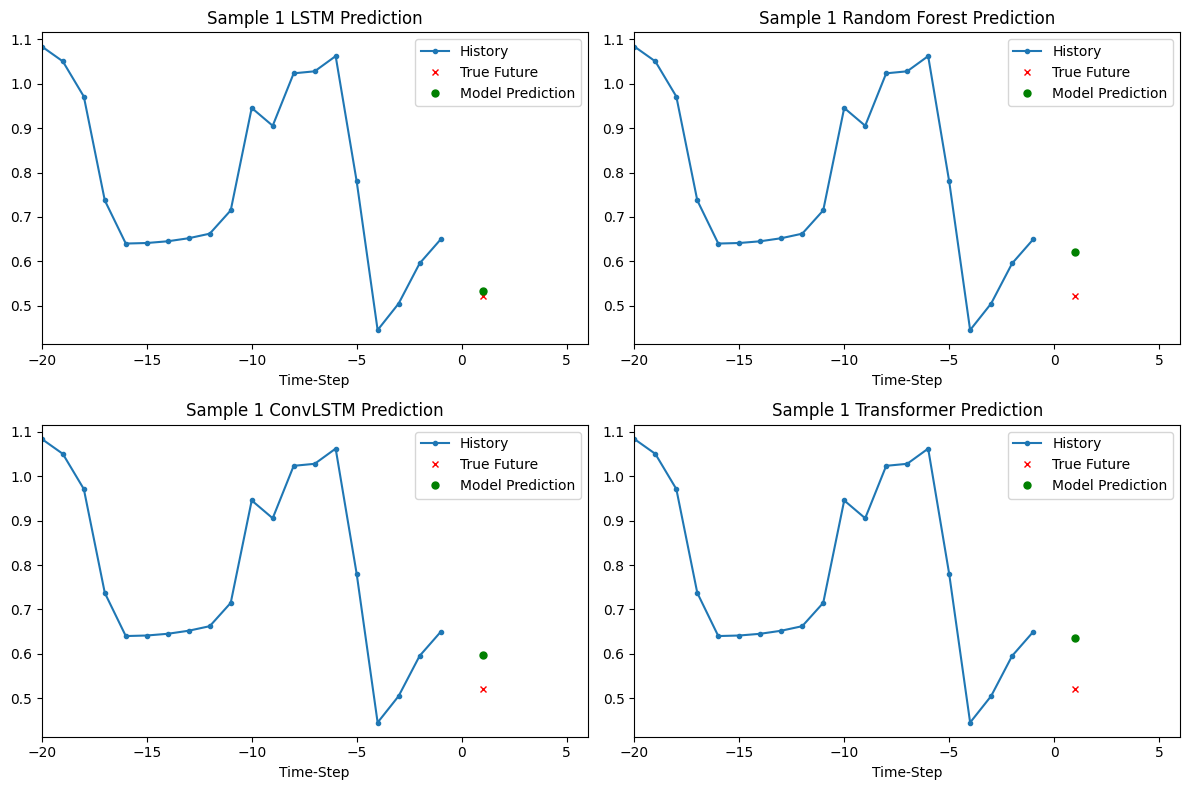

In [ ]:
# single step prediction for all models in one graph

def show_plot(plot_data, title, ax):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    future = 1

    ax.set_title(title)
    for i, val in enumerate(plot_data):
        if i:
            ax.plot(future, plot_data[i], marker[i], markersize=5, label=labels[i])
        else:
            ax.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    ax.legend()
    ax.set_xlim([time_steps[0], (future + 2) * 2])
    ax.set_xlabel("Time-Step")

# Prepare data for the plot
n = 1  # number of samples to visualize
random_indices = np.random.choice(len(X_test), n, replace=False)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, idx in enumerate(random_indices):
    x_sample = X_test[idx]
    y_sample = y_test[idx]
    history_ndvi = x_sample[:, 0]  # Select only NDVI_scaled from input_vars
    true_future = y_sample

    # LSTM
    y_pred_lstm = lstm_model.predict(x_sample[np.newaxis, :, :])[0]
    ax = axes[0, 0]
    show_plot([history_ndvi, true_future, y_pred_lstm], f"Sample {i + 1} LSTM Prediction", ax)

    # Random Forest
    y_pred_rf = rf_model.predict(x_sample.reshape(1, -1))[0]
    ax = axes[0, 1]
    show_plot([history_ndvi, true_future, y_pred_rf], f"Sample {i + 1} Random Forest Prediction", ax)

    # ConvLSTM
    x_sample_convlstm = x_sample[np.newaxis, :, np.newaxis, np.newaxis, :]
    y_pred_convlstm = convlstm_model.predict(x_sample_convlstm)[0]
    ax = axes[1, 0]
    show_plot([history_ndvi, true_future, y_pred_convlstm], f"Sample {i + 1} ConvLSTM Prediction", ax)

    # Transformer
    y_pred_transformer = transformer_model.predict(x_sample[np.newaxis, :, :])[0]
    ax = axes[1, 1]
    show_plot([history_ndvi, true_future, y_pred_transformer], f"Sample {i + 1} Transformer Prediction", ax)

plt.tight_layout()
plt.show()


## 4.2 Multiple prediction steps

In [ ]:
# LSTM model - radomly 10 timesteps

import random

def predict_next_steps(model, input_sequence, num_steps):
    predictions = []
    current_input = input_sequence.copy()
    for _ in range(num_steps):
        current_input_reshaped = current_input[np.newaxis, :, :]
        prediction = model.predict(current_input_reshaped)[0]
        predictions.append(prediction)
        current_input = np.roll(current_input, -1, axis=0)
        current_input[-1, 0] = prediction
    return np.array(predictions)

def show_plot(plot_data, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    future = np.arange(1, plot_data[1].shape[0] + 1)

    fig, ax = plt.subplots(figsize=(8, 4))
    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=5, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], future[-1] + 1])
    plt.xlabel("Time-Step")
    plt.show()

# Prepare data for the plot
n = 1000  # number of samples to train on
num_future_steps = 10  # Number of future steps to predict (from 21st to 30th)

predicted_ndvi_all = np.zeros((n, num_future_steps))  # Array to store the predicted NDVI values for all timesteps
expected_ndvi_all = np.zeros((n, num_future_steps))  # Array to store the expected NDVI values for all timesteps

# Randomly select 5 indices from the test set for visualization
n_visualize = 5
random_indices = random.sample(range(n), n_visualize)

for i in range(n):
    x_sample = X_test[i]
    y_sample = y_test[i : i + num_future_steps]

    # Generate the 21st to 30th NDVI predictions
    y_preds = predict_next_steps(lstm_model, x_sample, num_future_steps)

    # Append the predicted NDVI values to the array
    predicted_ndvi_all[i, :] = y_preds.flatten()
    expected_ndvi_all[i, :] = y_sample.flatten()

    history_ndvi = x_sample[:, 0]  # Select only NDVI_scaled from input_vars
    true_future = y_sample
    model_prediction = y_preds

    # If the current index is in the list of random indices, visualize the sample
    if i in random_indices:
        show_plot([history_ndvi, true_future, model_prediction], f"Sample {i + 1} Prediction")



In [ ]:
# RFmodel - radomly 10 timesteps

def predict_next_steps(model, input_sequence, num_steps):
    predictions = []
    current_input = input_sequence.copy()
    for _ in range(num_steps):
        current_input_reshaped = current_input.reshape(1, -1)
        prediction = model.predict(current_input_reshaped)[0]
        predictions.append(prediction)
        current_input = np.roll(current_input, -1, axis=0)
        current_input[-1, 0] = prediction
    return np.array(predictions)

def show_plot(plot_data, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    future = np.arange(1, plot_data[1].shape[0] + 1)

    fig, ax = plt.subplots(figsize=(8, 4))
    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=5, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], future[-1] + 1])
    plt.xlabel("Time-Step")
    plt.show()

# Prepare data for the plot
n = 1000  # number of samples to train on
num_future_steps = 10  # Number of future steps to predict (from 21st to 30th)

predicted_ndvi_all = np.zeros((n, num_future_steps))  # Array to store the predicted NDVI values for all timesteps
expected_ndvi_all = np.zeros((n, num_future_steps))  # Array to store the expected NDVI values for all timesteps

# Randomly select 5 indices from the test set for visualization
n_visualize = 5
random_indices = random.sample(range(n), n_visualize)

for i in range(n):
    x_sample = X_test[i]
    y_sample = y_test[i : i + num_future_steps]

    # Generate the 21st to 30th NDVI predictions
    y_preds = predict_next_steps(rf_model, x_sample, num_future_steps)

    # Append the predicted NDVI values to the array
    predicted_ndvi_all[i, :] = y_preds.flatten()
    expected_ndvi_all[i, :] = y_sample.flatten()

    history_ndvi = x_sample[:, 0]  # Select only NDVI_scaled from input_vars
    true_future = y_sample
    model_prediction = y_preds

    # If the current index is in the list of random indices, visualize the sample
    if i in random_indices:
        show_plot([history_ndvi, true_future, model_prediction], f"Sample {i + 1} Prediction")


In [ ]:
import random

def predict_next_steps_lstm(model, input_sequence, num_steps):
    predictions = []
    current_input = input_sequence.copy()
    for _ in range(num_steps):
        current_input_reshaped = current_input[np.newaxis, :, :]
        prediction = model.predict(current_input_reshaped)[0]
        predictions.append(prediction)
        current_input = np.roll(current_input, -1, axis=0)
        current_input[-1, 0] = prediction
    return np.array(predictions)

def predict_next_steps_rf(model, input_sequence, num_steps):
    predictions = []
    current_input = input_sequence.copy()
    for _ in range(num_steps):
        prediction = model.predict(current_input.reshape(1, -1))[0]
        predictions.append(prediction)
        current_input = np.roll(current_input, -1, axis=0)
        current_input[-1, 0] = prediction
    return np.array(predictions)

def predict_next_steps_convlstm(model, input_sequence, num_steps):
    predictions = []
    current_input = input_sequence.copy()
    for _ in range(num_steps):
        current_input_reshaped = current_input[np.newaxis, :, np.newaxis, np.newaxis, :]
        prediction = model.predict(current_input_reshaped)[0]
        predictions.append(prediction)
        current_input = np.roll(current_input, -1, axis=0)
        current_input[-1, 0] = prediction
    return np.array(predictions)

def predict_next_steps_transformer(model, input_sequence, num_steps):
    predictions = []
    current_input = input_sequence.copy()
    for _ in range(num_steps):
        current_input_reshaped = current_input[np.newaxis, :, :]
        prediction = model.predict(current_input_reshaped)[0]
        predictions.append(prediction)
        current_input = np.roll(current_input, -1, axis=0)
        current_input[-1, 0] = prediction
    return np.array(predictions)

def show_plot(plot_data, title, ax):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    future = np.arange(1, plot_data[1].shape[0] + 1)

    ax.set_title(title)
    for i, val in enumerate(plot_data):
        if i:
            ax.plot(future, plot_data[i], marker[i], markersize=5, label=labels[i])
        else:
            ax.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    ax.legend()
    ax.set_xlim([time_steps[0], future[-1] + 1])
    ax.set_xlabel("Time-Step")

# Prepare data for the plot
n = 300  # number of samples to train on
num_future_steps = 10  # Number of future steps to predict (from 21st to 30th)

# Randomly select 5 indices from the test set for visualization
n_visualize = 1
random_indices = random.sample(range(n), n_visualize)

for i in range(n):
    x_sample = X_test[i]
    y_sample = y_test[i : i + num_future_steps]

    # Generate the 21st to 30th NDVI predictions
    y_preds_lstm = predict_next_steps_lstm(lstm_model, x_sample, num_future_steps)
    y_preds_rf = predict_next_steps_rf(rf_model, x_sample,num_future_steps)
    y_preds_convlstm = predict_next_steps_convlstm(convlstm_model, x_sample, num_future_steps)
    y_preds_transformer = predict_next_steps_transformer(transformer_model, x_sample, num_future_steps)

    history_ndvi = x_sample[:, 0]  # Select only NDVI_scaled from input_vars
    true_future = y_sample

    # If the current index is in the list of random indices, visualize the sample
    if i in random_indices:
      fig, axs = plt.subplots(2, 2, figsize=(16, 8))

      show_plot([history_ndvi, true_future, y_preds_lstm], f"Sample {i + 1} LSTM Prediction", axs[0, 0])
      show_plot([history_ndvi, true_future, y_preds_rf], f"Sample {i + 1} RF Prediction", axs[0, 1])
      show_plot([history_ndvi, true_future, y_preds_convlstm], f"Sample {i + 1} ConvLSTM Prediction", axs[1, 0])
      show_plot([history_ndvi, true_future, y_preds_transformer], f"Sample {i + 1} Transformer Prediction", axs[1, 1])

      plt.tight_layout()
      plt.show()



## 4.3 View the prediction ability of models on different prediction timesteps

In [ ]:
#Cteate 2 dataframes for the model predicted NDVI and the correlated expected NDVI value

# Convert the NumPy arrays to pandas DataFrames
df_predicted = pd.DataFrame(data=predicted_ndvi_all, columns=["NDVI_t21", "NDVI_t22", "NDVI_t23", "NDVI_t24", "NDVI_t25", "NDVI_t26", "NDVI_t27", "NDVI_t28", "NDVI_t29", "NDVI_t30"])
df_expected = pd.DataFrame(data=expected_ndvi_all, columns=["NDVI_t21", "NDVI_t22", "NDVI_t23", "NDVI_t24", "NDVI_t25", "NDVI_t26", "NDVI_t27", "NDVI_t28", "NDVI_t29", "NDVI_t30"])

# Add index labels for each sequence
df_predicted.index = [f"Sequence {i+1}" for i in range(n)]
df_expected.index = [f"Sequence {i+1}" for i in range(n)]

# View the DataFrames
df_predicted



In [ ]:
df_expected

In [ ]:
# To view the correlation between predicted value and expected value in 1st, 5th and 10th timesteps

# Calculate R2 values
r2_21 = r2_score(df_expected["NDVI_t21"], df_predicted["NDVI_t21"])
r2_25 = r2_score(df_expected["NDVI_t25"], df_predicted["NDVI_t25"])
r2_30 = r2_score(df_expected["NDVI_t30"], df_predicted["NDVI_t30"])

# Plot scatter plot for timestep 21st
plt.scatter(df_predicted["NDVI_t21"], df_expected["NDVI_t21"])
plt.xlabel("Predicted NDVI (21st timestep)")
plt.ylabel("True NDVI (21st timestep)")
plt.title("Scatter Plot: Predicted NDVI vs. True NDVI (21st timestep)\nR2: {:.2f}".format(r2_21))
plt.show()

# Plot scatter plot for timestep 25th
plt.scatter(df_predicted["NDVI_t25"], df_expected["NDVI_t25"])
plt.xlabel("Predicted NDVI (25th timestep)")
plt.ylabel("True NDVI (25th timestep)")
plt.title("Scatter Plot: Predicted NDVI vs. True NDVI (25th timestep)\nR2: {:.2f}".format(r2_25))
plt.show()

# Plot scatter plot for timestep 30th
plt.scatter(df_predicted["NDVI_t30"], df_expected["NDVI_t30"])
plt.xlabel("Predicted NDVI (30th timestep)")
plt.ylabel("True NDVI (30th timestep)")
plt.title("Scatter Plot: Predicted NDVI vs. True NDVI (30th timestep)\nR2: {:.2f}".format(r2_30))
plt.show()


# Other models 